In [11]:
# balanced binary search tree
#
# we are using the same data structure a) for a tree and b) for a node in that tree
#
# note that this is a sorted data structure:
# for each node in the tree (including the root node), our implementation needs to make sure that
#    a) all items within the self._left subtree are smaller than self._item
#    b) all items within the self._right subtree are greater than or equal to self._item
#
import numpy as np

class BalancedBST:
    def __init__(self):
        self._left = None
        self._item = None
        self._right = None
        self._size = 0

    def get_root_item(self):
        return self._item
    
    # returns True if the tree contains value, False otherwise
    #
    def contains(self, value):
        return self._find_node(value) is not None
    
    def is_empty(self):
        return self._item is None
    
    # returns the number of data items stored in the tree
    #
    def get_size(self):
        return self._size

    # returns the smallest value stored in the tree data structure
    #
    def get_smallest(self):
        if self._left is None:
            return self._item
        else:
            return self._left.get_smallest()
        
    # returns the greatest value stored in the tree data structure
    #
    def get_greatest(self):
        if self._right is None:
            return self._item
        else:
            return self._right.get_greatest()
    
    # removes all content from the tree
    #
    def clear(self):
        # if self._left is not None:
        #     self._left.clear()
        # if self._right is not None:
        #     self._right.clear()
        self._left = None
        self._item = None
        self._right = None
        self._size = 0
    
    # attach an additional node to the tree, containing the value passed as an argument
    #
    # if the tree already contains the value, it will be added nonetheless
    #
    def insert(self, value):
        if self._item is None:
            self._item = value
        elif value < self._item:
            if self._left is None:
                self._left = BalancedBST()
                self._left._item = value
            else:
                self._left.insert(value)
        else:
            if self._right is None:
                self._right = BalancedBST()
                self._right._item = value
            else:
                self._right.insert(value)
        self._size += 1
        if self._size < 10:
            return  # no need to balance trees with fewer than ten elements
        
        # now check whether the tree needs to be rebalanced
        #
        if self._left is None:
            self._balance()
        elif self._right is None:
            self._balance()
        elif self._left._size >= 4*self._right._size or self._right._size >= 4*self._left._size:
            self._balance()
    
    # replaces the content of self with the content of a dyn. array (Python list)
    #
    def copy_from_dynarray(self, dynarray):
        self.clear()
        for el in dynarray:
            self.insert(el)
    
    # traversal of the binary search tree
    #
    # appends the content of self, in ascending order, to a Python list (dyn. array)
    #
    def append_to_dynarray(self, dynarray):
        if self._left is not None:
            self._left.append_to_dynarray(dynarray)
        dynarray.append(self._item)
        if self._right is not None:
            self._right.append_to_dynarray(dynarray)
    
    # traversal of the binary search tree
    #
    def write_into_array(self, arr, idx):
        if self._left is not None:
            idx = self._left.write_into_array(arr, idx)
        if self._item is not None:
            arr[idx] = self._item
            idx += 1
        if self._right is not None:
            idx = self._right.write_into_array(arr, idx)
        return idx
    
    # returns a string representing the tree structure
    #
    def to_string(self):
        if self._item is None:
            return "[]"
        if self._left is None and self._right is None:
            return str(self._item)
        content = str(self._item)
        if self._left is not None:
            content = content + " -> [" + self._left.to_string() + "]"
        else:
            content = content + " -> []"
        if self._right is not None:
            content = content + ", [" + self._right.to_string() + "]"
        else:
            content = content + ", []"
        return content

    # returns the/a node containing an item with a certain value
    #
    # if no such node exists, None is returned
    #
    def _find_node(self, value):
        if self._item is None:
            return None
        elif self._item == value:
            return self
        elif value < self._item:
            if self._left is None:
                return None
            else:
                return self._left._find_node(value)
        else:
            if self._right is None:
                return None
            else:
                return self._right._find_node(value)
    
    # rebalance the tree
    #
    def _balance(self):
        size = self._size
        if size < 10:  # unnecessary to rebalance smaller binary search trees
            return
        arr = np.empty(size+1, dtype=int)
        self.write_into_array(arr, 0)  # note that this array is already sorted
        self.clear()  # now we have all in the temporary storage and can rebuild the tree
        self._rebuild_from_sorted_array(arr, 0, size-1)  # recursively insert all data from the array

    def _rebuild_from_sorted_array(self, x, idx_min, idx_max):  # range x[idx_min: idx_max+1]
        # print("\treinserting", x[idx_min: idx_max+1], "; ", idx_min, idx_max)
        idx_mid = (idx_min + idx_max) // 2  # mid point as in binary search
        # print("\t\treinserting", x[idx_mid], "; ", idx_mid)
        self._item = x[idx_mid]
        if idx_mid-1 >= idx_min:
            self._left = BalancedBST()
            self._left._rebuild_from_sorted_array(x, idx_min, idx_mid-1)
        if idx_max >= idx_mid+1:
            self._right = BalancedBST()
            self._right._rebuild_from_sorted_array(x, idx_mid+1, idx_max)
        self._size = idx_max - idx_min + 1

In [12]:
# binary search tree (version without balancing, for comparison)
#
# we are using the same data structure a) for a tree and b) for a node in that tree
#
# note that this is a sorted data structure:
# for each node in the tree (including the root node), our implementation needs to make sure that
#    a) all items within the self._left subtree are smaller than self._item
#    b) all items within the self._right subtree are greater than or equal to self._item
#
class BinarySearchTree:
    def __init__(self):
        self._left = None
        self._item = None
        self._right = None

    def get_root_item(self):
        return self._item
    
    # returns True if the tree contains value, False otherwise
    #
    def contains(self, value):
        return self._find_node(value) is not None
    
    def is_empty(self):
        return self._item is None
    
    # returns the number of data items stored in the tree
    #
    def get_size(self):
        if self._item is None:
            return 0
        size = 1
        if self._left is not None:
            size += self._left.get_size()
        if self._right is not None:
            size += self._right.get_size()
        return size

    # returns the smallest value stored in the tree data structure
    #
    def get_smallest(self):
        if self._left is None:
            return self._item
        else:
            return self._left.get_smallest()
        
    # returns the greatest value stored in the tree data structure
    #
    def get_greatest(self):
        if self._right is None:
            return self._item
        else:
            return self._right.get_greatest()
    
    # removes all content from the tree
    #
    def clear(self):
        if self._left is not None:
            self._left.clear()
        if self._right is not None:
            self._right.clear()
        self._left = None
        self._item = None
        self._right = None
    
    # attach an additional node to the tree, containing the value passed as an argument
    #
    # if the tree already contains the value, it will be added nonetheless
    #
    def insert(self, value):
        if self._item is None:
            self._item = value
        elif value < self._item:
            if self._left is None:
                self._left = BinarySearchTree()
                self._left._item = value
            else:
                self._left.insert(value)
        else:
            if self._right is None:
                self._right = BinarySearchTree()
                self._right._item = value
            else:
                self._right.insert(value)
    
    # replaces the content of self with the content of a dyn. array (Python list)
    #
    def copy_from_dynarray(self, dynarray):
        self.clear()
        for el in dynarray:
            self.insert(el)
    
    # traversal of the binary search tree
    #
    # appends the content of self, in ascending order, to a Python list (dyn. array)
    #
    def append_to_dynarray(self, dynarray):
        if self._left is not None:
            self._left.append_to_dynarray(dynarray)
        dynarray.append(self._item)
        if self._right is not None:
            self._right.append_to_dynarray(dynarray)
    
    # returns a string representing the tree structure
    #
    def to_string(self):
        if self._item is None:
            return "[]"
        if self._left is None and self._right is None:
            return str(self._item)
        content = str(self._item)
        if self._left is not None:
            content = content + " -> [" + self._left.to_string() + "]"
        else:
            content = content + " -> []"
        if self._right is not None:
            content = content + ", [" + self._right.to_string() + "]"
        else:
            content = content + ", []"
        return content

    # returns the/a node containing an item with a certain value
    #
    # if no such node exists, None is returned
    #
    def _find_node(self, value):
        if self._item is None:
            return None
        elif self._item == value:
            return self
        elif value < self._item:
            if self._left is None:
                return None
            else:
                return self._left._find_node(value)
        else:
            if self._right is None:
                return None
            else:
                return self._right._find_node(value)

In [13]:
# minor test
#
test_tree = BalancedBST()
test_tree.copy_from_dynarray([7, 4, 25, 3, 13, 23, 25, 1, 111, 111, 111])

print("test_tree:", test_tree.to_string())
print("root node item:", test_tree.get_root_item())

print("rebalancing")
test_tree._balance()
print("test_tree:", test_tree.to_string())
print("root node item:", test_tree.get_root_item())

print("does the tree contain 13?:", test_tree.contains(13))
test_tree._find_node(13)
print("test that the node with 13 is found:", test_tree._find_node(13).get_root_item())

print("does the tree contain 12?:", test_tree.contains(12))
test_tree._find_node(12)
print("test that _find_node(12) returns None:", test_tree._find_node(12) is None)

test_tree: 7 -> [4 -> [3 -> [1], []], []], [25 -> [13 -> [], [23]], [25 -> [], [111 -> [], [111 -> [], [111]]]]]
root node item: 7
rebalancing
test_tree: 23 -> [4 -> [1 -> [], [3]], [7 -> [], [13]]], [111 -> [25 -> [], [25]], [111 -> [], [111]]]
root node item: 23
does the tree contain 13?: True
test that the node with 13 is found: 13
does the tree contain 12?: False
test that _find_node(12) returns None: True


In [51]:
test_list = []
test_tree.append_to_dynarray(test_list)
print("test_list:", test_list)

test_list: [1, 3, 4, 7, 13, 23, 25, 25, 111, 111, 111]


In [52]:
def natmatch_brute_force(x, y):
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if (x[i]+x[j] == y) and (x[i] != x[j]):
                return [x[i], x[j]]
    return []

def natmatch_dict(x, y):
    mydict = {}
    for i in range(len(x)):
        c = y - x[i]
        if c in mydict:
            return [c, x[i]]
        mydict[x[i]] = i
    return []

def natmatch_dynarray(x, y):
    mylist = []
    for i in range(len(x)):
        c = y - x[i]
        if c in mylist:
            return [c, x[i]]
        mylist.append(x[i])
    return []

def natmatch_BST(x, y):
    tree = BinarySearchTree()
    for i in range(len(x)):
        c = y - x[i]
        if tree.contains(c):
            return [c, x[i]]
        tree.insert(x[i])
    return []

def natmatch_BBST(x, y):
    tree = BalancedBST()
    for i in range(len(x)):
        c = y - x[i]
        if tree.contains(c):
            return [c, x[i]]
        tree.insert(x[i])
    return []

In [53]:
import random

k = 15

random.seed()
x = [random.randrange(k*k) for j in range(k)]
print("List x =", x, "where y =", k*k)
print("Brute force: Return value obtained as", natmatch_brute_force(x, k*k))
print("Dictionary storage: Return value obtained as", natmatch_dict(x, k*k))
print("Dynamic array storage: Return value obtained as", natmatch_dynarray(x, k*k))
print("Simple BST storage: Return value obtained as", natmatch_BST(x, k*k))
print("Balanced BST storage: Return value obtained as", natmatch_BBST(x, k*k))

List x = [16, 97, 128, 84, 213, 76, 131, 211, 60, 68, 201, 130, 65, 45, 102] where y = 225
Brute force: Return value obtained as [97, 128]
Dictionary storage: Return value obtained as [97, 128]
Dynamic array storage: Return value obtained as [97, 128]
Simple BST storage: Return value obtained as [97, 128]
Balanced BST storage: Return value obtained as [97, 128]


In [54]:
import time
import random

init = 250
step = 250
nmax = 12000
repetitions = 25

perf_brute_force = {}
perf_dict = {}
perf_dynarray = {}
perf_BST = {}
perf_BBST = {}
random.seed()
    
iterations = 0
matches_brute_force = 0
matches_dict = 0
matches_dynarray = 0
matches_BST = 0
matches_BBST = 0

for n in range(0, nmax+1, step):
    iterations += 1
    
    runtime_brute_force = 0.0
    runtime_dict = 0.0
    runtime_dynarray = 0.0
    runtime_BST = 0.0
    runtime_BBST = 0.0
    
    for i in range(repetitions):
        test_list = [random.randrange(n*n) for j in range(n)]
        
        start = time.time()
        if len(natmatch_brute_force(test_list, n*n)) > 0:
            matches_brute_force += 1
        runtime_brute_force += time.time() - start
        
        start = time.time()
        if len(natmatch_dict(test_list, n*n)) > 0:
            matches_dict += 1
        runtime_dict += time.time() - start
        
        start = time.time()
        if len(natmatch_dynarray(test_list, n*n)) > 0:
            matches_dynarray += 1
        runtime_dynarray += time.time() - start
        
        start = time.time()
        if len(natmatch_BST(test_list, n*n)) > 0:
            matches_BST += 1
        runtime_BST += time.time() - start
        
        start = time.time()
        if len(natmatch_BBST(test_list, n*n)) > 0:
            matches_BBST += 1
        runtime_BBST += time.time() - start
        
    perf_brute_force[n] = runtime_brute_force / repetitions
    perf_dict[n] = runtime_dict / repetitions
    perf_dynarray[n] = runtime_dynarray / repetitions
    perf_BST[n] = runtime_BST / repetitions
    perf_BBST[n] = runtime_BBST / repetitions
    
    print(n, perf_brute_force[n], perf_dict[n], perf_dynarray[n], perf_BST[n], perf_BBST[n], sep='\t')
    print("\t\t", round(matches_brute_force/(iterations*repetitions), 6), \
          round(matches_dict/(iterations*repetitions), 6), \
          round(matches_dynarray/(iterations*repetitions), 6), \
          round(matches_BST/(iterations*repetitions), 6), \
          round(matches_BBST/(iterations*repetitions), 6), sep="  ")

0	1.049041748046875e-06	1.0776519775390624e-06	9.822845458984375e-07	1.7642974853515626e-06	1.6689300537109375e-06
		  0.0  0.0  0.0  0.0  0.0
250	0.002148466110229492	5.144119262695312e-05	0.0002492237091064453	0.0012241744995117188	0.002525949478149414
		  0.16  0.16  0.16  0.16  0.16
500	0.007738122940063477	7.838249206542969e-05	0.0007819461822509765	0.0022533607482910158	0.004577112197875976
		  0.213333  0.213333  0.213333  0.213333  0.213333
750	0.019317550659179686	0.00012740135192871094	0.0016937255859375	0.0037677383422851565	0.007757015228271484
		  0.26  0.26  0.26  0.26  0.26
1000	0.03134757995605469	0.0001519775390625	0.002904958724975586	0.004782199859619141	0.009877443313598633
		  0.296  0.296  0.296  0.296  0.296
1250	0.04826801300048828	0.00018276214599609374	0.004197874069213867	0.007006654739379883	0.01220062255859375
		  0.32  0.32  0.32  0.32  0.32
1500	0.07049726486206055	0.000235137939453125	0.006618127822875976	0.008841218948364258	0.01609407424926758
		  0.32

KeyboardInterrupt: 

<AxesSubplot:xlabel='input list size', ylabel='average runtime in seconds'>

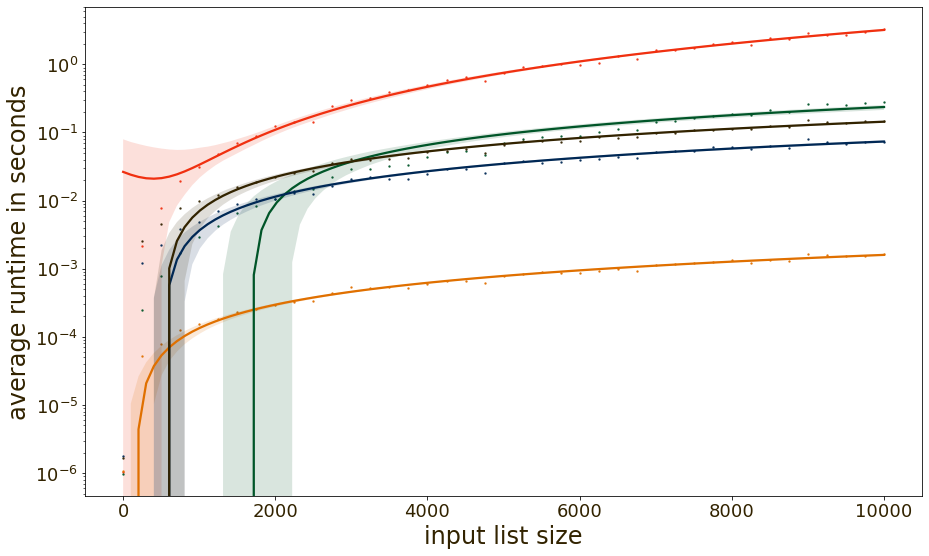

In [56]:
import seaborn as sbn
import matplotlib.pyplot as plt

keylist_brute_force = list(perf_brute_force.keys())
vallist_brute_force = list(perf_brute_force.values())

keylist_dict = list(perf_dict.keys())
vallist_dict = list(perf_dict.values())

keylist_dynarray = list(perf_dynarray.keys())
vallist_dynarray = list(perf_dynarray.values())

keylist_BST = list(perf_BST.keys())
vallist_BST = list(perf_BST.values())

keylist_BBST = list(perf_BBST.keys())
vallist_BBST = list(perf_BBST.values())

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("input list size", fontsize=24, color="#322300")
ax.set_ylabel("average runtime in seconds", fontsize=24, color="#322300")
ax.set_yscale('log')

sbn.regplot(x=keylist_brute_force, y=vallist_brute_force, \
            color='#f03010', order=2, scatter_kws={'s':2})  # red for brute force
sbn.regplot(x=keylist_dict, y=vallist_dict, color='#e07000', \
            order=1, scatter_kws={'s':2})  # orange for dict
sbn.regplot(x=keylist_dynarray, y=vallist_dynarray, \
            color='#005528', order=1, scatter_kws={'s':2})  # green for Python list (dyn. array)
sbn.regplot(x=keylist_BST, y=vallist_BST, color='#002855', \
            order=1, scatter_kws={'s':2})  # blue for binary search tree without balancing
sbn.regplot(x=keylist_BBST, y=vallist_BBST, color='#322300', \
            order=1, scatter_kws={'s':2})  # black for balanced binary search tree 